In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_excel(r'C:\Users\onyekao\OneDrive - Iowa State University\Documents\Spring 2023\ML\Cancer Data.xlsx', sheet_name='Average Train')
test_set = pd.read_excel(r'C:\Users\onyekao\OneDrive - Iowa State University\Documents\Spring 2023\ML\Cancer Data.xlsx', sheet_name='Average Test')

In [3]:
training_set['Class'] = training_set['Class'].replace(2,0)
training_set['Class'] = training_set['Class'].replace(4,1)


In [4]:
test_set['Class'] = test_set['Class'].replace(2,0)
test_set['Class'] = test_set['Class'].replace(4,1)


In [5]:
y_train=training_set.iloc[:,10].to_numpy()
X_train=training_set.iloc[:,1:10].to_numpy()

In [6]:
y_test=test_set.iloc[:,10].to_numpy()

In [7]:
X_test=test_set.iloc[:,1:10].to_numpy()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.96
Precision: 0.9047619047619048
Recall: 1.0
F1 score: 0.9500000000000001


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Clump Thickness",fontsize=10)
    plt.ylabel("Uniformity of Cell Size",fontsize=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\onyekao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

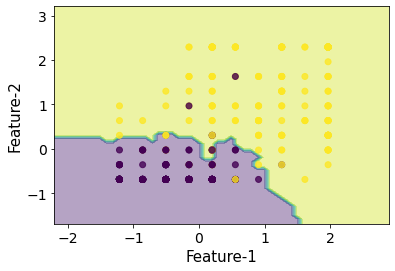

In [14]:
plot_decision_boundaries(X_train, y_train, KNeighborsClassifier)

In [16]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975973 using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.971959 (0.020407) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.971959 (0.020407) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.975973 (0.019591) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.975973 (0.019591) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.972612 (0.018970) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.973279 (0.018867) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.967946 (0.022858) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.969279 (0.022350) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.967279 (0.024481) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.967279 (0.024481) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.970626 (

<module 'matplotlib.pyplot' from 'C:\\Users\\onyekao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

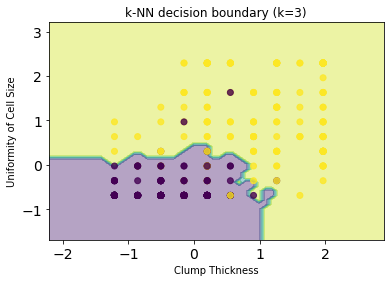

In [21]:
plt.figure()
plt.title('k-NN decision boundary (k=3)')
plot_decision_boundaries(X_train, y_train, KNeighborsClassifier, n_neighbors=3, metric= 'euclidean', weights= 'uniform')

In [22]:
model = KNeighborsClassifier( n_neighbors=3, metric= 'euclidean', weights= 'uniform')
model.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.96
Precision: 0.9047619047619048
Recall: 1.0
F1 score: 0.9500000000000001
